In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.3     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
summary_all_common <- readRDS("summary_all_common.rds")
colnames(summary_all_common)

[1] "Model"                         "Locus_name"                   
 [3] "Model_string"                  "Rates"                        
 [5] "Likelihood"                    "Unconstrained_likelihood"     
 [7] "parameters"                    "AIC"                          
 [9] "AICc"                          "BIC"                          
[11] "Best"                          "Length"                       
[13] "Ntaxa"                         "Percent_constant"             
[15] "Percent_parsimony_informative" "Site_patterns"                
[17] "RF_distance"                   "nRF_distance"                 
[19] "wRF_distance"                  "KF_distance"                  
[21] "PD_distance"                   "wPD_distance"                 
[23] "Tree_Length"                   "Sum_int"                      
[25] "prop_int"                      "Min."                         
[27] "1st Qu."                       "Median"                       
[29] "Mean"                          "3rd Qu."                      
[31] "Max."                          "Type"                         
[33] "If_mix"                        "Num_class"                    
[35] "Num_class_on_mixture"          "Run_time"                     
[37] "class_id"                      "class"                        
[39] "F_type"                        "df_R"                         
[41] "R"                             "F"                            
[43] "Q"                             "base_freq"

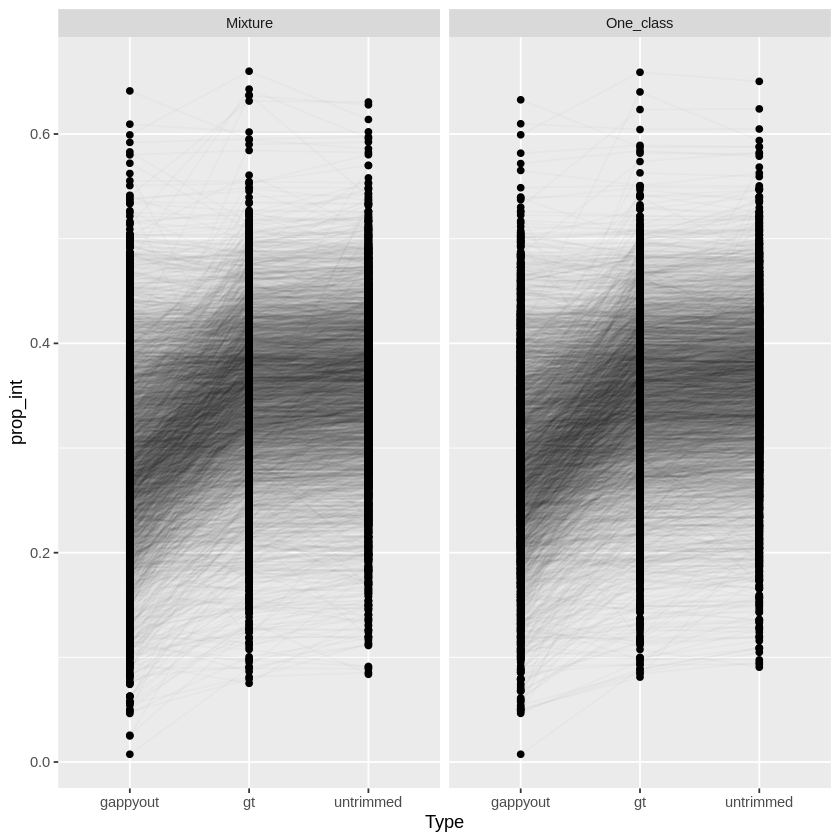

In [3]:
summary_all_common %>%
  filter(class_id == 1) %>% 
  ggplot(aes(x = Type, y = prop_int, group = Locus_name)) +
    geom_point() + geom_line(alpha = 0.02) + facet_wrap(~Model)

In [7]:
summary_arcoss_type <- summary_all_common %>% 
  filter(class_id == 1) %>%
  group_by(Locus_name, Model) %>%
  summarise(
    sum_RF_distance = sum(RF_distance),
    cv_RF_distance = sd(RF_distance)/mean(RF_distance),
    sum_Tree_Length = sum(Tree_Length),
    cv_Tree_Length = sd(Tree_Length)/mean(Tree_Length),
    sum_PD_distance = sum(PD_distance),
    cv_PD_distance = sd(PD_distance)/mean(PD_distance),
    sum_BIC = sum(BIC),
    cv_BIC = sd(BIC)/mean(BIC),
    sum_Likelihood = sum(Likelihood),
    cv_Likelihood = -sd(Likelihood)/mean(Likelihood),
    Num_mix = sum(If_mix == TRUE),
    Num_Best_Mixture = sum(Best == "Mixture"),
    Num_class_on_mixture = mean(Num_class_on_mixture)
    .groups = "drop"
  ) %>% na.omit()

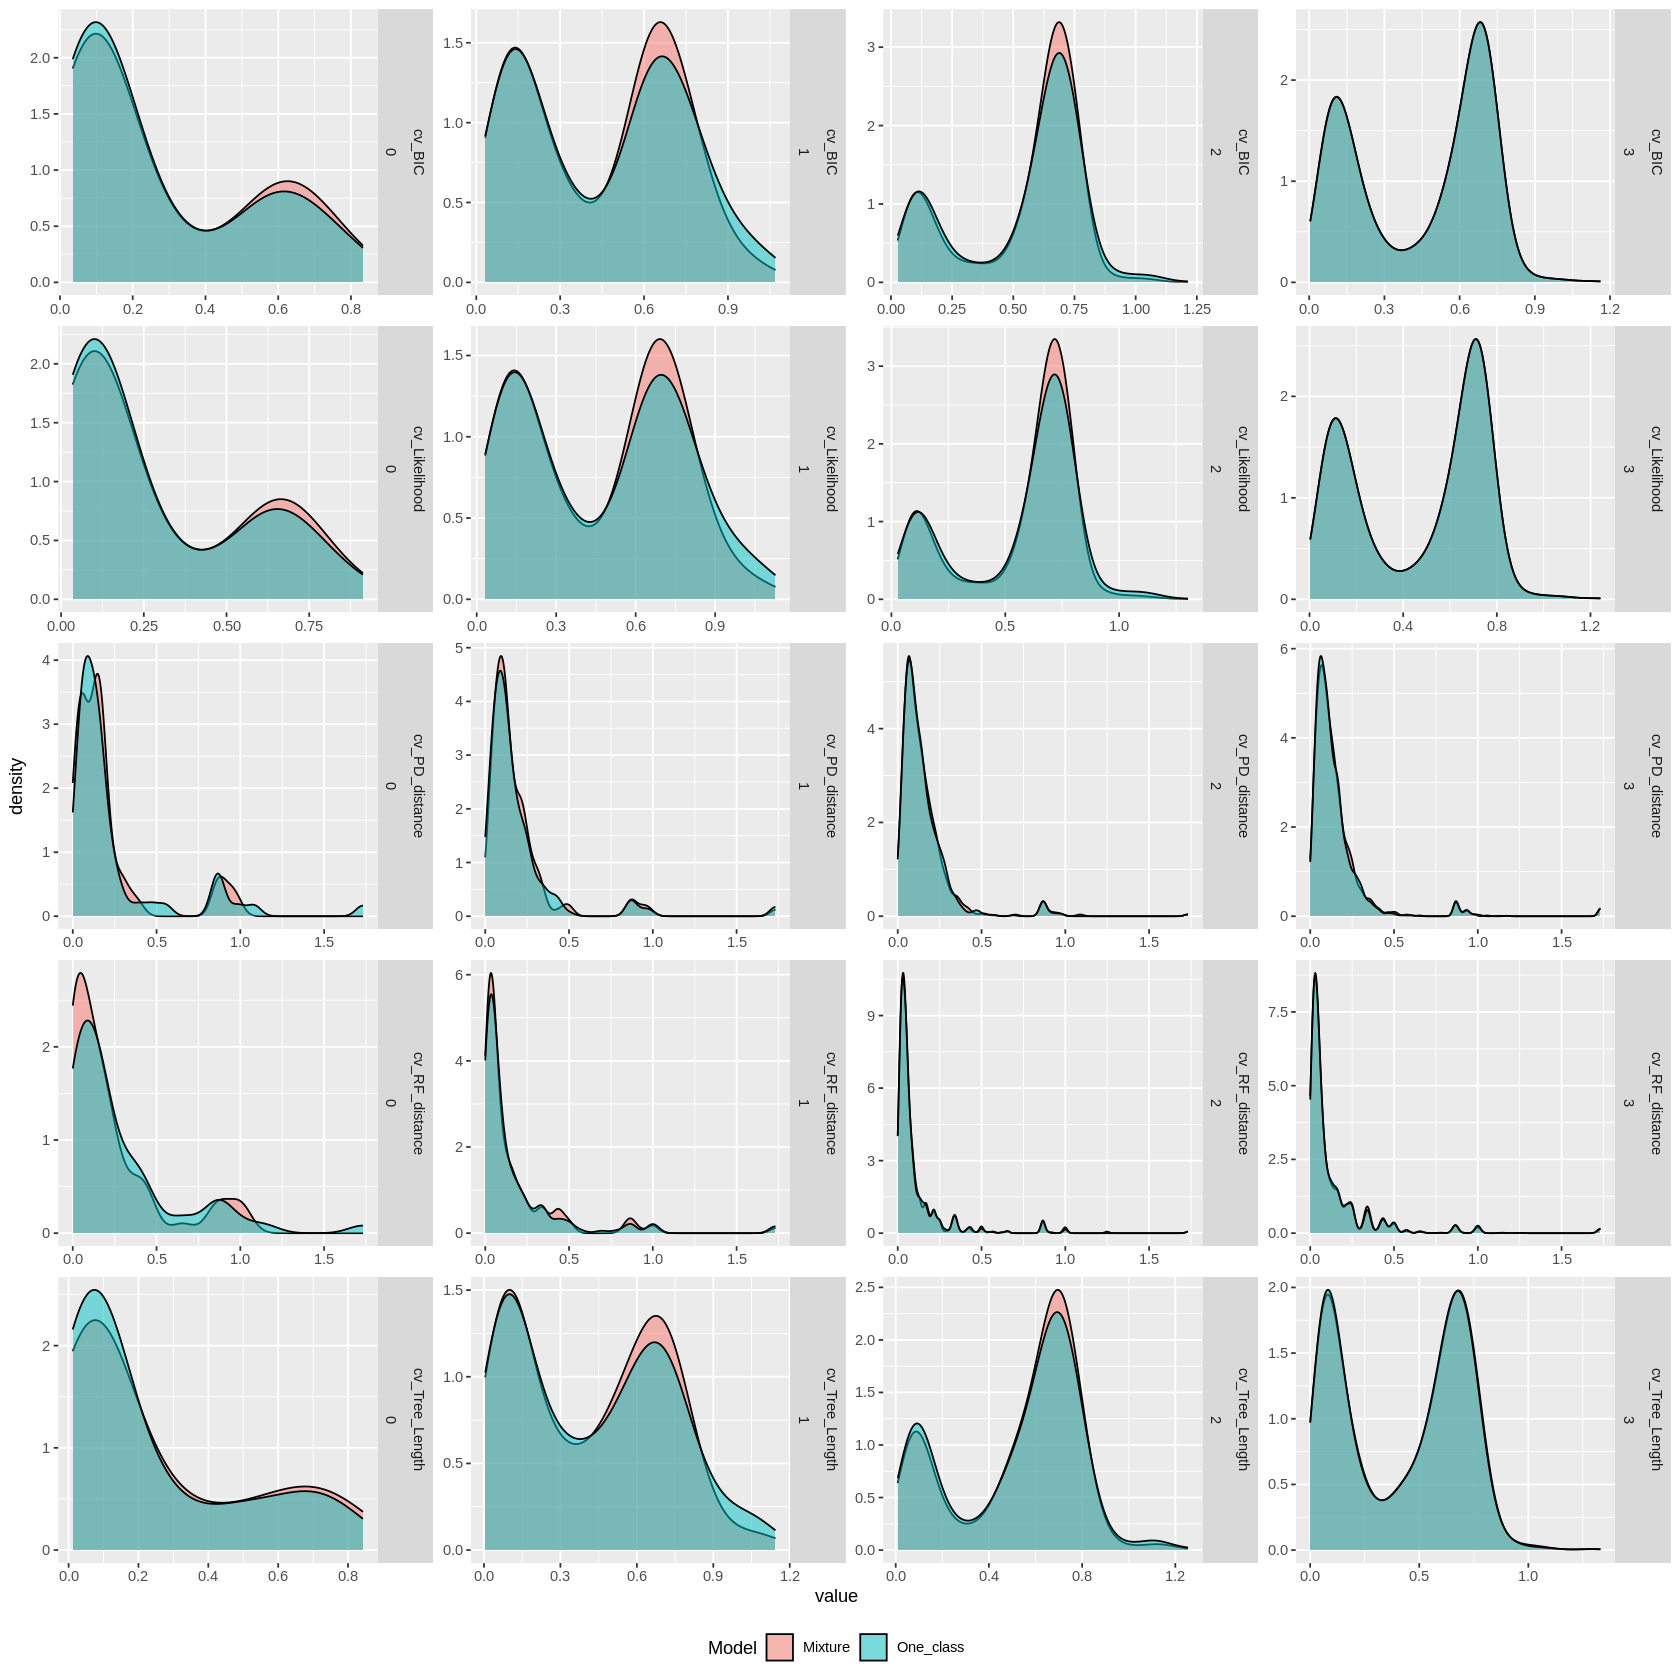

In [13]:
options(repr.plot.width = 14, repr.plot.height = 14)
summary_arcoss_type %>%
    select(Locus_name, Model, Num_Best_Mixture, cv_RF_distance, 
           cv_Tree_Length, cv_PD_distance, cv_BIC, cv_Likelihood) %>%
    pivot_longer(names_to = "variable", values_to = "value", cols = -c(Locus_name, Model, Num_Best_Mixture)) %>% 
    ggplot(aes(x = value, fill = Model)) +
    geom_density(alpha = 0.5) + facet_wrap(variable~Num_Best_Mixture, scales = "free", ncol = 4, strip.position = "right") +
  theme(legend.position = "bottom")

In [9]:
summary_arcoss_type %>% filter(Num_class_on_mixture > 1) %>%
    select(Locus_name, Model,
           sum_RF_distance, sum_Tree_Length, sum_PD_distance, sum_BIC, sum_Likelihood) %>%
    group_by(Model) %>% 
    summarise(
        mean_RF_distance = mean(sum_RF_distance),
        mean_Tree_Length = mean(sum_Tree_Length),
        mean_PD_distance = mean(sum_PD_distance),
        mean_BIC = mean(sum_BIC),
        mean_Likelihood = mean(sum_Likelihood),
        .groups = "drop"
    )

Model,mean_RF_distance,mean_Tree_Length,mean_PD_distance,mean_BIC,mean_Likelihood
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mixture,135.9599,9.679805,292.0200,49228.16,-23791.68
One_class,135.3604,9.258554,290.8694,49234.61,-23818.05


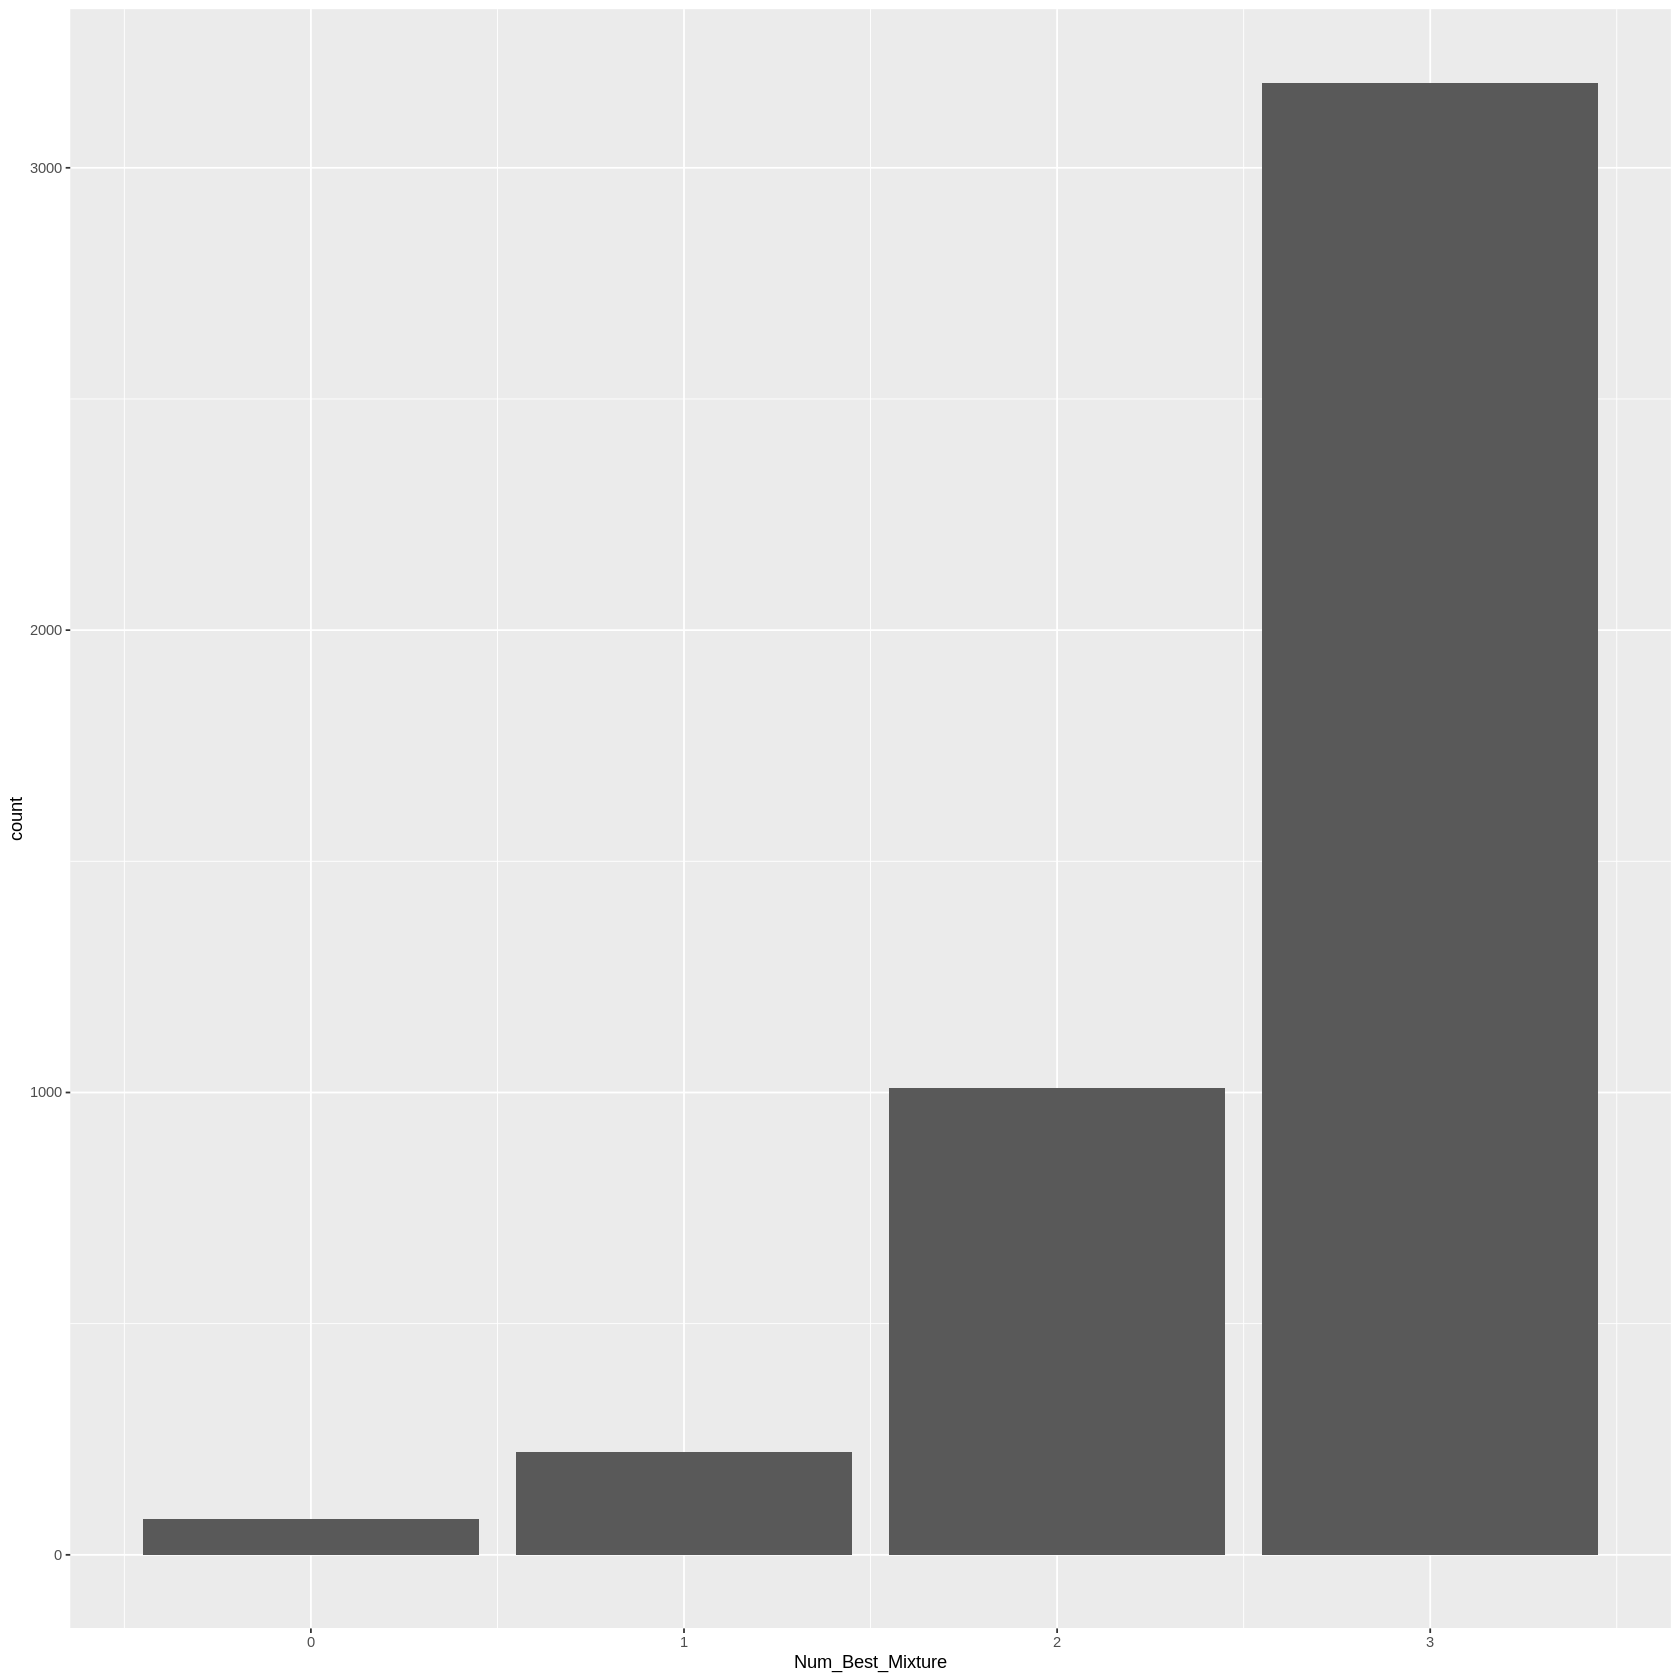

In [10]:
summary_arcoss_type %>% filter(Num_class_on_mixture > 1) %>% ggplot(aes(x = Num_Best_Mixture)) + geom_bar()